## Affinity Propagation ##
Affinity Propagation is an unsupervised clustering algorithm based on the concept of "message passing" between data points.  This algorithm particularly does not require the number of clusters as input.  
It applies the concept of "exemplars," members of the input set that are representative of clusters.
The main drawback is, this algorithm is computationally expensive.

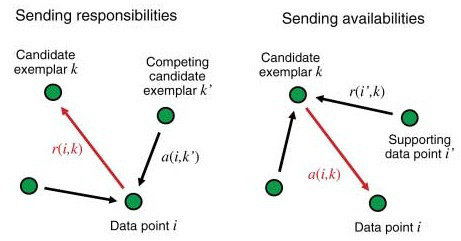

### Steps of the algorithm ### 


1. The algorithm first calculates the Similarity Matrix for all the data points.  The similarity is calculated as negative squared euclidian distance.
$$s(i, k) = - \lvert\lvert x_i - x_k \rvert\rvert^2$$


2. The diagonal elements of the matrix is zero as per the above formula.  If the diagonal values are not modified that means all the elemnets will be an exemplars and many clusters will be formed.  There are two ways to control this situation.  The values can be modified either by the minimum value of the similarities between points or by the median value of the similarities.  In the former case least number of clusters will be formed whereas in the later case a moderate number of clusters will be formed.


3. As a next step it creates the "responsibility" matrix $R$ which has values $r(i, k)$ that quantify how well-suited $x_k$ is to serve as the exemplar for $x_i$, relative to other candidate exemplars for $x_i$.  The greater the value, the higher the chance that $x_k$ is an exemplar for $x_i$. The calculation is done by the below definition.

    $$r(i, k) \leftarrow s(i, k) - \max\limits_{k' s.t. k' \neq k}\{ a(i, k') + s(i, k') \}$$

    As the formula states, the responsibility of $k$ towards $i$ will decrease as the availability of some other $k'$ to $i$ increases.


4. The damping factor is used in the calculation as below.  This is in order to avoid numerical oscillations when updating         these values

    $$R = R * damping + (1 - damping) * R_{new}$$


5. The "availability" matrix $A$ contains values $a(i, k)$ that represent how "appropriate" it would be for $x_i$ to pick $x_k$ as its exemplar, taking into account other points' preference for $x_k$ as an exemplar. 

    For the diagonal elements (self availabilities) the calculation is done by the below definition.

    $$a(k, k) \leftarrow \sum\limits_{i' \neq k}\max(0, r(i', k))$$

    $a(k, k)$ reflects accumulated evidence that point $k$ is suitable to be an exemplar, based on the positive 
    responsibilities of $k$ towards other elements.


6. For the off diagonal elements the calculation is done by the below definition.

    $$a(i, k) \leftarrow \min\{0, r(k,k) + \sum\limits_{i' s.t. i' \notin \{i, k\}}{\max\{0, r(i', k)\}}$$

    The formula states that, availability is self-responsibility of $k$ plus the positive responsibilities of $k$ towards
    elements other than $i$. The intuition to include only positive responsibilities is: an exemplar should be positively 
    responsible to some data points, regardless of the negative responsibilites to other data points.
    If self-responsibility is negative, it means that $k$ is more suitable to belong to another exemplar, rather than being an 
    exemplar.
    
    The damping factor is used in the similar way as mentioned above.


7. The values are updated through iterations.  Iterations are performed until either the cluster boundaries remain unchanged over a number of iterations, or some predetermined number (of iterations) is reached. 


8. Criterion matrix is calculated after the updating is terminated. Criterion matrix $C$ is the sum of $R$ and $A$. The formula is

    $$c(i,k) \leftarrow r(i,k) + a(i,k)$$
    
    An element $i$ will be assigned to an exemplar $k$ which is not only highly responsible but also highly available to $i$.
    

9. The exemplars are extracted from the final matrices as those whose 'responsibility + availability' for themselves is positive (i.e. $(r(i,i)+a(i,i))>0$)


10. For point $i$, the $k$ with maximum $r(i, k) + a(i, k)$ represents point $i’s$ exemplar or cluster.

### Key parameters as per scikit learn ###

**damping** - Damping factor (between 0.5 and 1) is the extent to which the current value is maintained relative to incoming values (weighted 1 - damping). This in order to avoid numerical oscillations when updating these values (messages).

**max_iter** - Maximum number of iterations. Default is 200.

**preference** - Preferences for each point - points with larger values of preferences are more likely to be chosen as exemplars. The number of exemplars, i.e. of clusters, is influenced by the input preferences value. If the preferences are not passed as arguments, they will be set to the median of the input similarities.

This preference value indicates how strongly a data point thinks itself should be an exemplar. It is the diagonal value of the similarity matrix, $S$. If we choose to leave this value unmodified, we will see almost no clustering as most data points choose to be an exemplar for themselves. If we haven’t got a priori knowledge of the data points it is advised to start with a preference equal to the median of the input similarities.
Intuitively, if we want Affinity Propagation to be less eager in splitting clusters we can set the preference value lower.


### Output from the algorithm ###
**labels** - Cluster labels are returned.

### Sources ###
- https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8

- https://en.wikipedia.org/wiki/Affinity_propagation#:~:text=In%20statistics%20and%20data%20mining,message%20passing%22%20between%20data%20points.

- https://www.researchgate.net/figure/Message-Passing-in-Affinity-Propagation-4_fig1_321462147